In [2]:
#import libraries
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('data/vw.csv') #load data into pandas dataframe
df.head() #display first 5 rows
df.sample(n=5) #display 5 random rows

In [23]:
df.dropna(how = 'all', inplace = True) #removes rows which contain any blank cells
df_numeric = df.select_dtypes(include=[np.number]) #select coloumns which contain numeric data
for col in df_numeric:
    if col=='year':
        continue
    average =  np.average(df_numeric[col])
    standard_deviation = np.std(df_numeric[col])
    max_value = average + 3*standard_deviation
    min_value = average - 3*standard_deviation
    for idx, row_val in enumerate(df_numeric[col]):
        if min_value<row_val<max_value: #check if value is an outlier with average +- 3*s.d.
            print(df.iloc[idx])

model               T-Roc
year                 2019
transmission    Automatic
mileage             13904
fuelType           Diesel
tax                   145
mpg                  49.6
engineSize            2.0
price               25000
Name: 0, dtype: object

In [37]:
#One Hot Encoding
df_non_numeric = df.select_dtypes(exclude=[np.number]) #Finding the coloumns with categorical data

label = LabelEncoder()
for col in df_non_numeric:
    #Find the unique categories i.e (Manual, Semi-Auto and Automatics)
    s=set()
    for val in df_non_numeric[col]:
        s.add(val)
    s=list(s)
    int_data = label.fit_transform(s)
    int_data = int_data.reshape(len(int_data), 1)
    onehot_data = OneHotEncoder(sparse=False) 
    onehot_data = (onehot_data.fit_transform(int_data)) #Convert the categories into onehot data
    df[col] = np.array([onehot_data[s.index(val)] for val in df[col]]) #Add these categories to the dataset
    

In [38]:
target_variable = ['price']
Predictors = ['model',	'year',	'transmission',	'mileage',	'fuelType',	'tax',	'mpg',	'engineSize']
X=df[Predictors].values
y=df[target_variable].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10609, 8)
(10609, 1)
(4548, 8)
(4548, 1)


In [65]:
#define model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(4, kernel_initializer = 'normal', activation  = 'relu'))
model.add(tf.keras.layers.Dense(4, kernel_initializer = 'normal', activation  = 'relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer = 'normal'))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=["acc"])


In [66]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 300,validation_split = 0.1, verbose=1)

Epoch 1/300
478/478 [==============================] - 2s 3ms/step - loss: 315513220.6764 - acc: 0.0000e+00 - val_loss: 238526080.0000 - val_acc: 0.0000e+00
Epoch 2/300
478/478 [==============================] - 1s 2ms/step - loss: 224455267.2401 - acc: 0.0000e+00 - val_loss: 206269024.0000 - val_acc: 0.0000e+00
Epoch 3/300
478/478 [==============================] - 1s 3ms/step - loss: 180805512.5846 - acc: 0.0000e+00 - val_loss: 123181448.0000 - val_acc: 0.0000e+00
Epoch 4/300
478/478 [==============================] - 1s 2ms/step - loss: 91198506.6555 - acc: 0.0000e+00 - val_loss: 47007480.0000 - val_acc: 0.0000e+00
Epoch 5/300
478/478 [==============================] - 1s 3ms/step - loss: 41928085.7370 - acc: 0.0000e+00 - val_loss: 41498164.0000 - val_acc: 0.0000e+00
Epoch 6/300
478/478 [==============================] - 1s 2ms/step - loss: 39972386.3466 - acc: 0.0000e+00 - val_loss: 40294576.0000 - val_acc: 0.0000e+00
Epoch 7/300
478/478 [==============================] - 1s 2ms/st

81.40381949977932


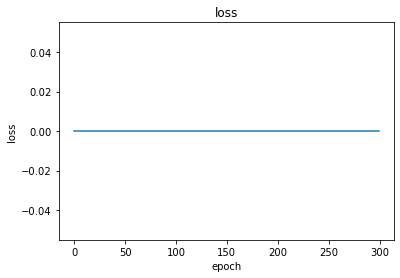

In [67]:
MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
print(100-MAPE)
import matplotlib.pyplot as plt
# print(history.history.keys())
plt.plot(history.history['acc'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()